# **Supervised Learning**

# **1.   Linear Regression Model**

In [ ]:
# Step 1: Download data and save data file to CSV
import yfinance as yf
import matplotlib.pyplot as plt

# Download data
ticker_symbol = 'EURUSD=X'
start_date = '2023-04-08'
end_date = '2024-04-08'
currency_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
currency_data.to_csv('currency_data.csv')

currency_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-10,1.091358,1.091822,1.083248,1.091358,1.091358,0
2023-04-11,1.086933,1.092669,1.086803,1.086933,1.086933,0
2023-04-12,1.091751,1.099856,1.091524,1.091751,1.091751,0
2023-04-13,1.099989,1.106900,1.098165,1.099989,1.099989,0
2023-04-14,1.105461,1.107542,1.097803,1.105461,1.105461,0
...,...,...,...,...,...,...
2024-04-01,1.079273,1.080147,1.073157,1.079273,1.079273,0
2024-04-02,1.073722,1.077877,1.072536,1.073722,1.073722,0
2024-04-03,1.076855,1.083189,1.076473,1.076855,1.076855,0


In [ ]:
# Step 2: Visualize Data

# Print the first few rows of the data
print(currency_data.head())

# Data Info
currency_data.info()

#Data description
currency_data.describe()

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-04-10  1.091358  1.091822  1.083248  1.091358   1.091358       0
2023-04-11  1.086933  1.092669  1.086803  1.086933   1.086933       0
2023-04-12  1.091751  1.099856  1.091524  1.091751   1.091751       0
2023-04-13  1.099989  1.106900  1.098165  1.099989   1.099989       0
2023-04-14  1.105461  1.107542  1.097803  1.105461   1.105461       0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2023-04-10 to 2024-04-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


,Open,High,Low,Close,Adj Close,Volume
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.0
mean,1.084770,1.087731,1.081549,1.084771,1.084771,0.0
std,0.015101,0.015067,0.014902,0.015101,0.015101,0.0
min,1.047230,1.049428,1.044987,1.047230,1.047230,0.0
25%,1.075729,1.078397,1.072464,1.075729,1.075729,0.0
50%,1.086449,1.089218,1.083330,1.086449,1.086449,0.0
75%,1.094808,1.098065,1.091870,1.094808,1.094808,0.0
max,1.123760,1.127574,1.122007,1.123760,1.123760,0.0


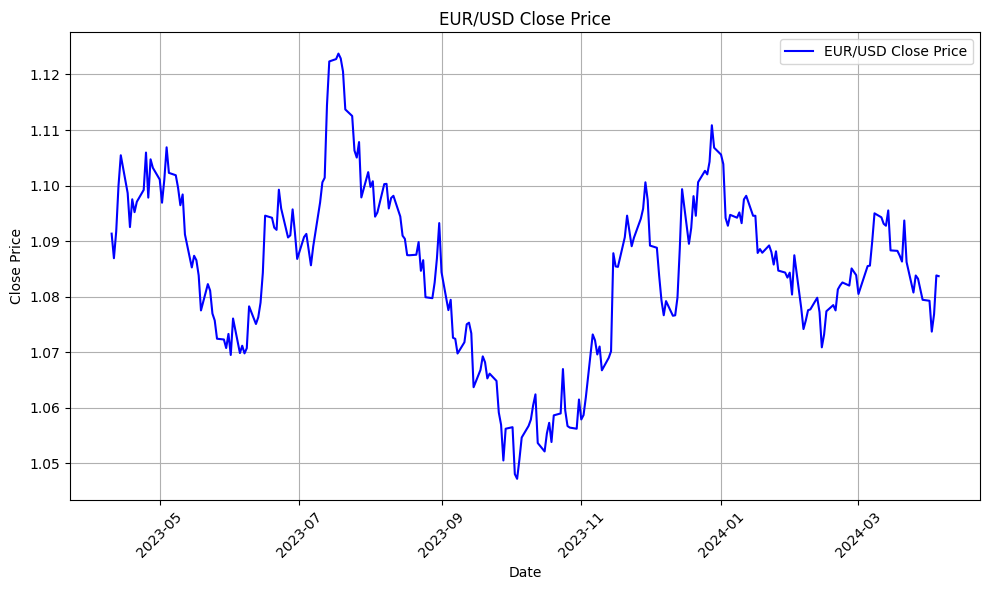

In [ ]:
#Line Chart of EUR/USD Close Price
plt.figure(figsize=(10, 6))
plt.plot(currency_data.index, currency_data['Close'], label='EUR/USD Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('EUR/USD Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Candlestick Chart of EUR/USD Close Price
import plotly.graph_objects as go

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=currency_data.index,
                open=currency_data['Open'],
                high=currency_data['High'],
                low=currency_data['Low'],
                close=currency_data['Close'])])

fig.update_layout(title='EUR/USD Candlestick Chart',
                   xaxis_title='Date',
                   yaxis_title='Price (EUR/USD)')

fig.show()

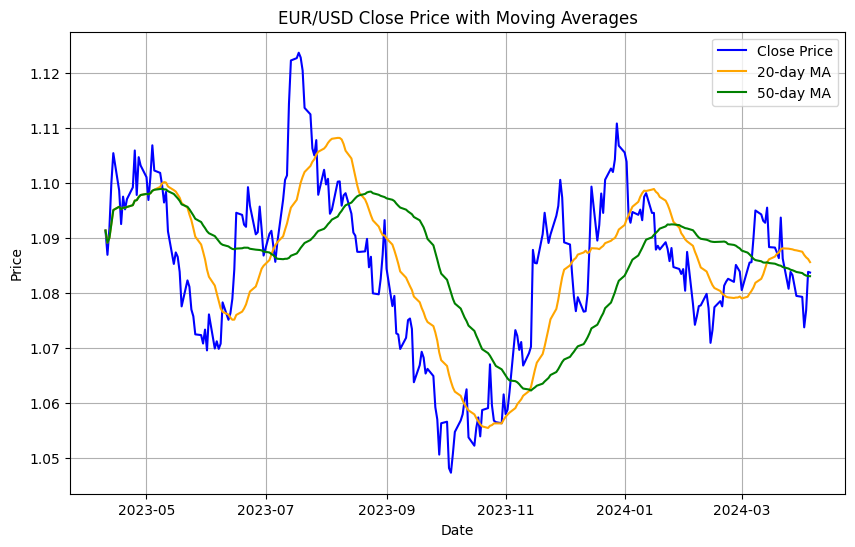

In [ ]:
# Calculate moving averages
short_window = 20  # Short-term moving average window
long_window = 50   # Long-term moving average window
currency_data['Short_MA'] = currency_data['Close'].rolling(window=short_window, min_periods=1).mean()
currency_data['Long_MA'] = currency_data['Close'].rolling(window=long_window, min_periods=1).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(currency_data['Close'], label='Close Price', color='blue')
plt.plot(currency_data['Short_MA'], label=f'{short_window}-day MA', color='orange')
plt.plot(currency_data['Long_MA'], label=f'{long_window}-day MA', color='green')

plt.title('EUR/USD Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


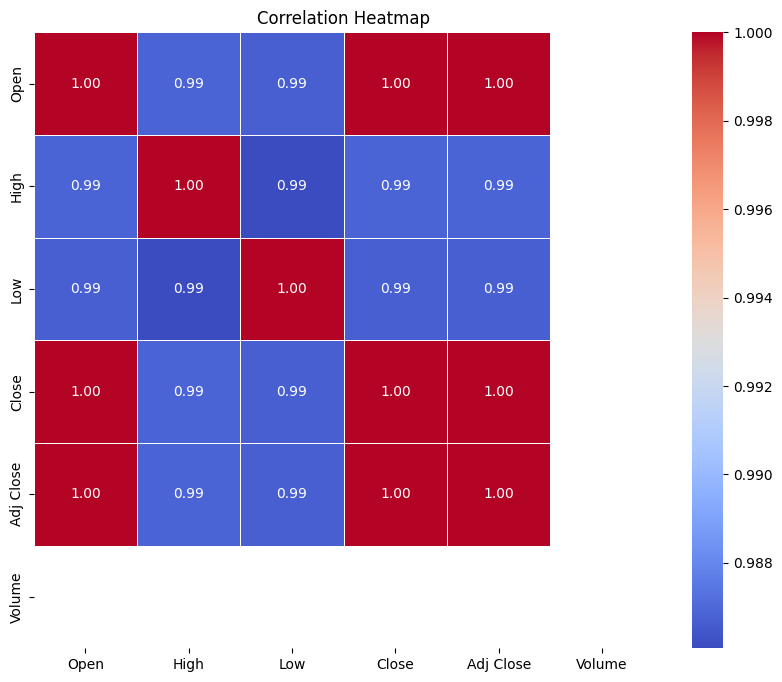

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = currency_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Step 3: Data cleaning: Remove volume column

# Check for missing values
missing_values = currency_data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates
duplicates = currency_data.duplicated().sum()
print("Number of duplicates:", duplicates)

# Remove volume column
currency_data = currency_data.drop(columns=['Volume'])

# Print the last few rows of the data
print(currency_data.tail())

Missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Short_MA     0
Long_MA      0
dtype: int64
Number of duplicates: 0
                Open      High       Low     Close  Adj Close  Short_MA  \
Date                                                                      
2024-04-01  1.079273  1.080147  1.073157  1.079273   1.079273  1.087499   
2024-04-02  1.073722  1.077877  1.072536  1.073722   1.073722  1.086909   
2024-04-03  1.076855  1.083189  1.076473  1.076855   1.076855  1.086472   
2024-04-04  1.083835  1.087583  1.083506  1.083835   1.083835  1.086166   
2024-04-05  1.083705  1.084846  1.079168  1.083705   1.083705  1.085600   

             Long_MA  
Date                  
2024-04-01  1.083612  
2024-04-02  1.083326  
2024-04-03  1.083147  
2024-04-04  1.083060  
2024-04-05  1.083040  


In [ ]:
# Calculate total number of days
total_days = len(currency_data)
print("Total days:", total_days)

Total days: 260


In [ ]:
from sklearn.model_selection import train_test_split

# Step 4: Feature engineering
currency_data['Daily_Return'] = currency_data['Close'].pct_change()

# Step 5: Data Processing for previous month close price prediction
currency_data['Date'] = currency_data.index

# Drop missing values
currency_data.dropna(inplace=True)

# Step 6: Feature selection
X = currency_data[['Open', 'High', 'Low', 'Adj Close']]
y = currency_data['Close']

# Step 7: Data splitting
from sklearn.model_selection import train_test_split

currency_data['Date'] = currency_data.index

train_end_date = currency_data['Date'].iloc[-52]
X_train, y_train = X[currency_data['Date'] <= train_end_date], y[currency_data['Date'] <= train_end_date]
X_test, y_test = X[currency_data['Date'] > train_end_date], y[currency_data['Date'] > train_end_date]

In [ ]:
# Check the shape of the training and testing sets
print("Testing set shape:", X_test.shape, y_test.shape)
print("Training set shape:", X_train.shape, y_train.shape)

Testing set shape: (51, 4) (51,)
Training set shape: (208, 4) (208,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Step 8: Model Training

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()





*   **Linear Regression Model Results - Testing Set**






Actual vs Predicted Closing Prices for Last Month (Linear Regression):
             Actual Close  Predicted Close (Linear Regression)
Date                                                         
2024-01-26      1.084705                             1.084705
2024-01-29      1.084352                             1.084352
2024-01-30      1.083447                             1.083447
2024-01-31      1.084340                             1.084340
2024-02-01      1.080392                             1.080392
2024-02-02      1.087465                             1.087465
2024-02-05      1.078004                             1.078004
2024-02-06      1.074183                             1.074183
2024-02-07      1.075720                             1.075720
2024-02-08      1.077575                             1.077575
2024-02-09      1.077726                             1.077726
2024-02-12      1.079820                             1.079820
2024-02-13      1.077226                             1.07722

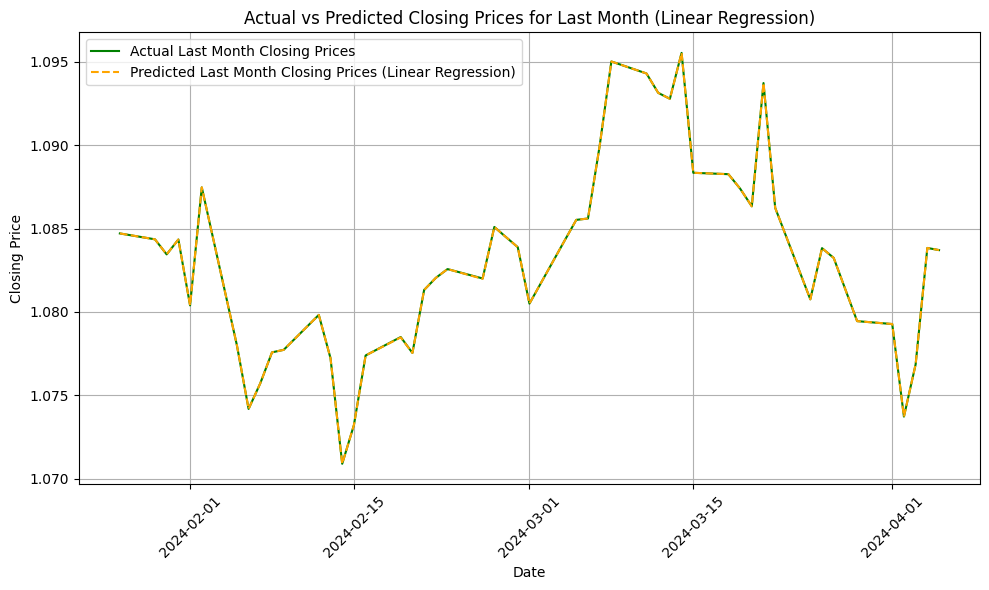

In [ ]:
# Step 9: Predict & Compare Closing Prices for Previous Month (Testing Set)

import pandas as pd

# Predict previous month closing prices
last_month_predictions_lr = model_lr.predict(X_test)

# Create a DataFrame to compare actual and predicted closing prices for Linear Regression
comparison_last_month_df_lr = pd.DataFrame({'Actual Close': y_test, 'Predicted Close (Linear Regression)': last_month_predictions_lr})

# Print comparison of actual vs predicted closing prices for Linear Regression
print("Actual vs Predicted Closing Prices for Last Month (Linear Regression):\n", comparison_last_month_df_lr)

# Plot actual vs previous month close price for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual Last Month Closing Prices', color='green')
plt.plot(X_test.index, last_month_predictions_lr, label='Predicted Last Month Closing Prices (Linear Regression)', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices for Last Month (Linear Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   **Linear Regression Model Results - Training Set**



Comparison of Actual vs Predicted Closing Prices on Training Set (Linear Regression):
             Actual Close  Predicted Close (Linear Regression)
Date                                                         
2023-04-11      1.086933                             1.086933
2023-04-12      1.091751                             1.091751
2023-04-13      1.099989                             1.099989
2023-04-14      1.105461                             1.105461
2023-04-17      1.098660                             1.098660
...                  ...                                  ...
2024-01-19      1.087914                             1.087914
2024-01-22      1.089230                             1.089230
2024-01-23      1.088021                             1.088021
2024-01-24      1.085788                             1.085788
2024-01-25      1.088175                             1.088175

[208 rows x 2 columns]


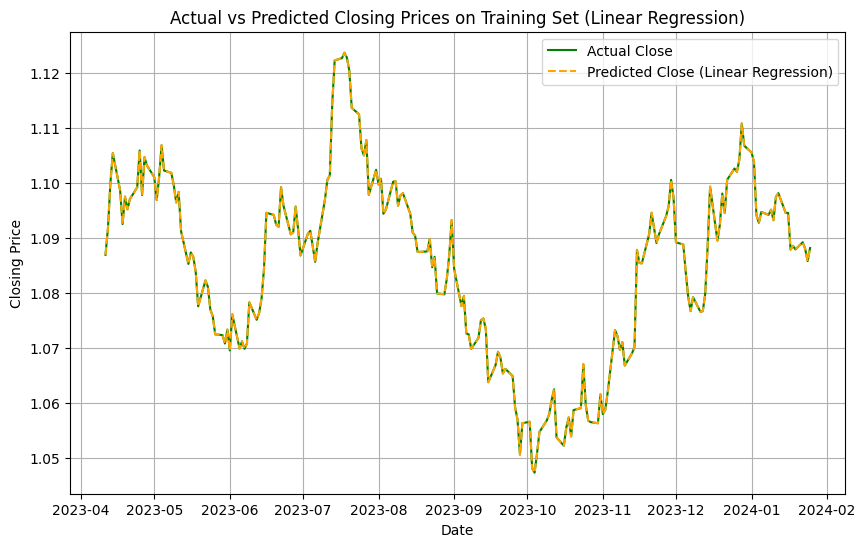

In [ ]:
# Step 10: Predict & Compare Closing Prices for Previous Month (Training Set)

# Predict closing prices on the training set for Linear Regression
train_predictions_lr = model_lr.predict(X_train)

# Create a DataFrame to compare actual and predicted closing prices on the training set for Linear Regression
comparison_train_df_lr = pd.DataFrame({'Actual Close': y_train, 'Predicted Close (Linear Regression)': train_predictions_lr})

# Print comparison of actual vs predicted closing prices on the training set for Linear Regression
print("Comparison of Actual vs Predicted Closing Prices on Training Set (Linear Regression):\n", comparison_train_df_lr)

# Plot actual vs predicted closing prices on the training set for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Actual Close', color='green')
plt.plot(y_train.index, train_predictions_lr, label='Predicted Close (Linear Regression)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Closing Prices on Training Set (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


*   **Predict Future Closing Prices for Linear Regression**





Predicted Future Closing Prices for Linear Regression:
          Date  Predicted Close (Linear Regression)
0  2024-04-06                             1.079479
1  2024-04-07                             1.059798
2  2024-04-08                             1.094112
3  2024-04-09                             1.079989
4  2024-04-10                             1.080969
5  2024-04-11                             1.066675
6  2024-04-12                             1.092645
7  2024-04-13                             1.084796
8  2024-04-14                             1.096722
9  2024-04-15                             1.098268
10 2024-04-16                             1.090675
11 2024-04-17                             1.085782
12 2024-04-18                             1.086132
13 2024-04-19                             1.082261
14 2024-04-20                             1.078655
15 2024-04-21                             1.078169
16 2024-04-22                             1.083396
17 2024-04-23             

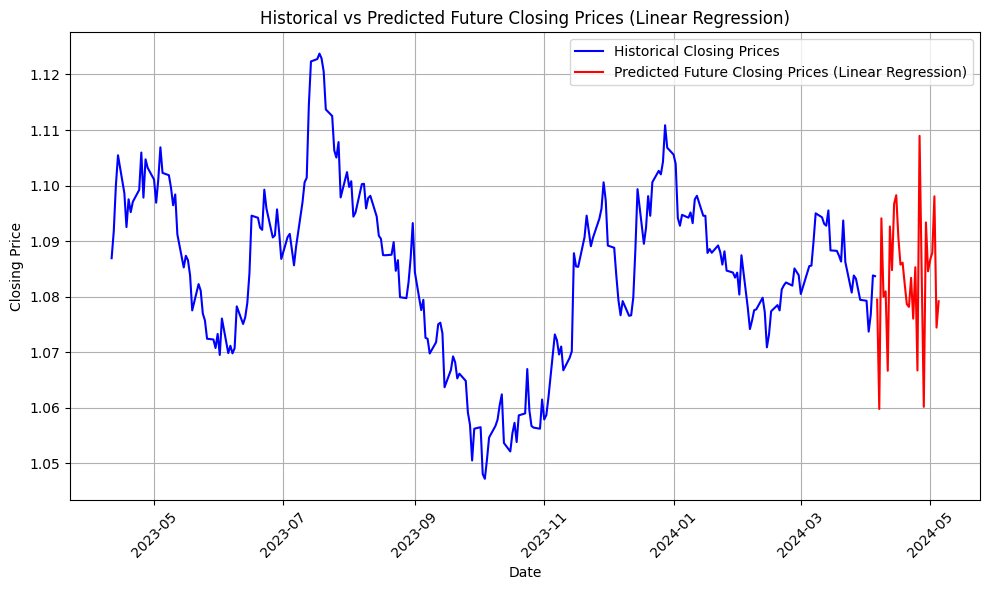

In [ ]:
# Step 11: Data processing for future close price prediction
from datetime import timedelta
import numpy as np

# Data Processing for future close price prediction
mean_lr = X.mean()
std_lr = X.std()
num_samples_lr = 30  # Assuming we want to predict for the next 30 days
future_dates_lr = pd.date_range(start=currency_data.index[-1] + timedelta(days=1), periods=num_samples_lr)
future_data_lr = pd.DataFrame(np.random.normal(loc=mean_lr, scale=std_lr, size=(num_samples_lr, len(X.columns))), columns=X.columns)
future_data_lr['Date'] = future_dates_lr
future_data_lr = future_data_lr[['Date', 'Open', 'High', 'Low', 'Adj Close']]

# Step 12: Predict future closing prices
# Predict future closing prices for Linear Regression
future_predictions_lr = model_lr.predict(future_data_lr[['Open', 'High', 'Low', 'Adj Close']])

# Create a DataFrame to store predicted values with dates for Linear Regression
predicted_df_lr = pd.DataFrame({'Date': future_dates_lr, 'Predicted Close (Linear Regression)': future_predictions_lr})

# Print the DataFrame for Linear Regression
print("Predicted Future Closing Prices for Linear Regression:\n", predicted_df_lr)

# Plot the predicted future closing prices for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(currency_data.index, currency_data['Close'], label='Historical Closing Prices', color='blue')
plt.plot(predicted_df_lr['Date'], predicted_df_lr['Predicted Close (Linear Regression)'], label='Predicted Future Closing Prices (Linear Regression)', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical vs Predicted Future Closing Prices (Linear Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

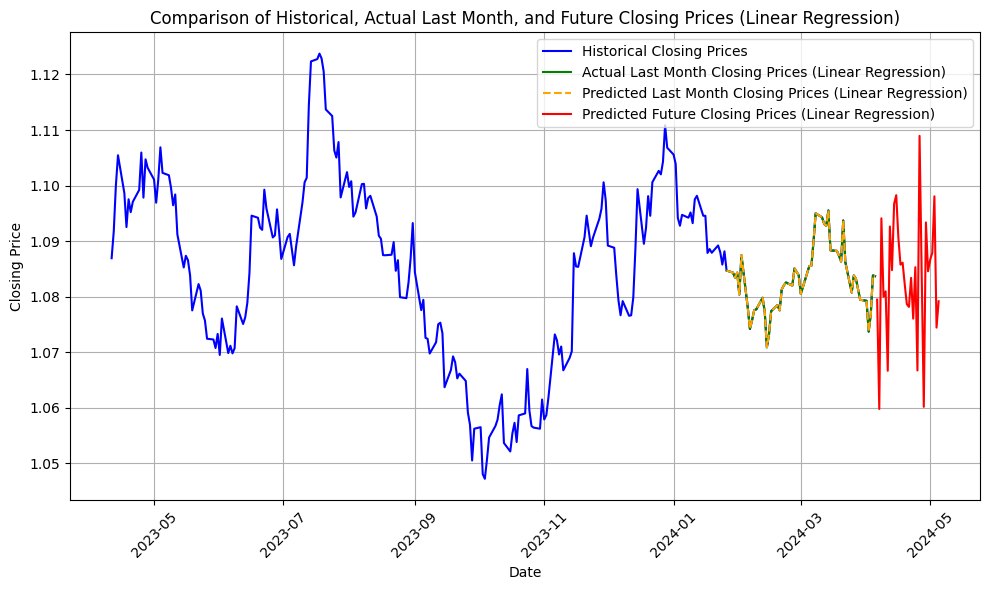

In [ ]:
# Comparison Plot of Historical, Actual Last Month, and Future Closing Prices for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(currency_data.index, currency_data['Close'], label='Historical Closing Prices', color='blue')
plt.plot(X_test.index, y_test, label='Actual Last Month Closing Prices (Linear Regression)', color='green')
plt.plot(X_test.index, last_month_predictions_lr, label='Predicted Last Month Closing Prices (Linear Regression)', color='orange', linestyle='--')
future_dates_range_lr = pd.date_range(start=currency_data.index[-1] + pd.Timedelta(days=1), periods=len(predicted_df_lr))
plt.plot(future_dates_range_lr, predicted_df_lr['Predicted Close (Linear Regression)'], label='Predicted Future Closing Prices (Linear Regression)', color='red')
last_month_indices_lr = np.arange(len(X_test)) + len(currency_data) - len(X_test)
#plt.plot(currency_data.index[last_month_indices_lr], y_test_lr, label='Actual Last Month Closing Prices (Linear Regression)', color='green')
#plt.plot(currency_data.index[last_month_indices_lr], last_month_predictions_lr, label='Predicted Last Month Closing Prices (Linear Regression)', color='orange')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Comparison of Historical, Actual Last Month, and Future Closing Prices (Linear Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **2.   Random Forest Regressor Model**

In [ ]:
# Step 1: Model Training
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)



*   **Random Forest Regressor Model Results - Testing Set**



Comparison of Actual vs Predicted Closing Prices for Last Month (Random Forest Regressor):
             Actual Close  Predicted Close (Random Forest Regressor)
Date                                                               
2024-01-26      1.084705                                   1.084701
2024-01-29      1.084352                                   1.083973
2024-01-30      1.083447                                   1.083861
2024-01-31      1.084340                                   1.084473
2024-02-01      1.080392                                   1.080257
2024-02-02      1.087465                                   1.087439
2024-02-05      1.078004                                   1.077914
2024-02-06      1.074183                                   1.073843
2024-02-07      1.075720                                   1.075990
2024-02-08      1.077575                                   1.077379
2024-02-09      1.077726                                   1.077573
2024-02-12      1.079820

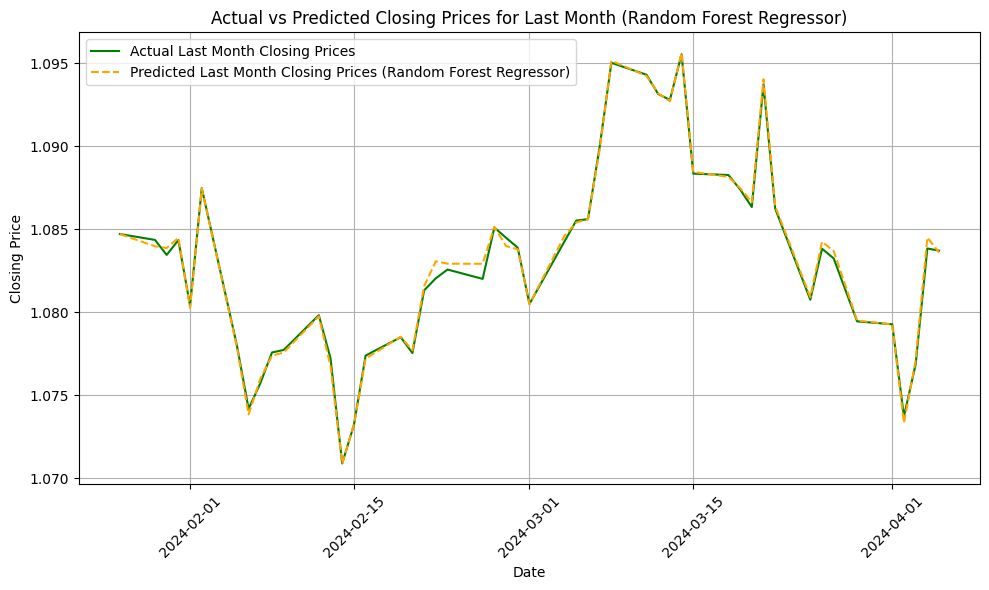

In [ ]:
# Step 2: Predict & Compare Closing Prices for Previous Month (Testing Set)

# Predict previous month closing prices
last_month_predictions_rf = model_rf.predict(X_test)

# Create a DataFrame to compare actual and predicted closing prices for Random Forest Regressor
comparison_last_month_df_rf = pd.DataFrame({'Actual Close': y_test, 'Predicted Close (Random Forest Regressor)': last_month_predictions_rf})

# Print comparison of actual vs predicted closing prices for Random Forest Regressor
print("Comparison of Actual vs Predicted Closing Prices for Last Month (Random Forest Regressor):\n", comparison_last_month_df_rf)

# Plot actual vs previous month close price for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual Last Month Closing Prices', color='green')
plt.plot(X_test.index, last_month_predictions_rf, label='Predicted Last Month Closing Prices (Random Forest Regressor)', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices for Last Month (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   **Random Forest Regressor Model Results - Training Set**

Comparison of Actual vs Predicted Closing Prices on Training Set (Random Forest Regressor):
             Actual Close  Predicted Close (Random Forest Regressor)
Date                                                               
2023-04-11      1.086933                                   1.086923
2023-04-12      1.091751                                   1.091797
2023-04-13      1.099989                                   1.100008
2023-04-14      1.105461                                   1.105393
2023-04-17      1.098660                                   1.098528
...                  ...                                        ...
2024-01-19      1.087914                                   1.087866
2024-01-22      1.089230                                   1.089203
2024-01-23      1.088021                                   1.087938
2024-01-24      1.085788                                   1.085703
2024-01-25      1.088175                                   1.088053

[208 rows x 2 columns]

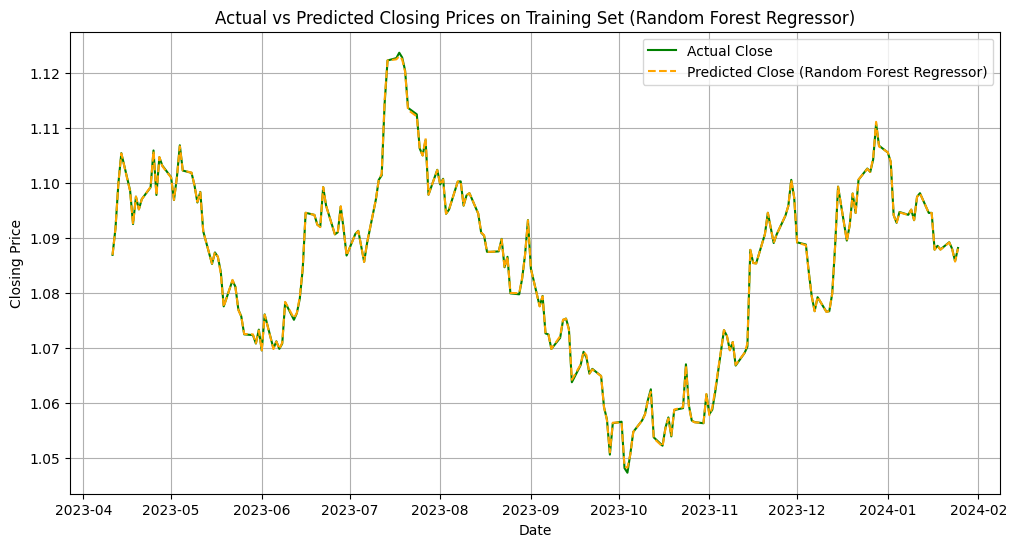

In [ ]:
# Step 3: Predict & Compare Closing Prices for Previous Month (Training Set)

# Predict closing prices on the training set for Random Forest Regressor
train_predictions_rf = model_rf.predict(X_train)

# Create a DataFrame to compare actual and predicted closing prices on the training set for Random Forest Regressor
comparison_train_df_rf = pd.DataFrame({'Actual Close': y_train, 'Predicted Close (Random Forest Regressor)': train_predictions_rf})

# Print comparison of actual vs predicted closing prices on the training set for Random Forest Regressor
print("Comparison of Actual vs Predicted Closing Prices on Training Set (Random Forest Regressor):\n", comparison_train_df_rf)

# Plot actual vs predicted closing prices on the training set for Random Forest Regressor
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Actual Close', color='green')
plt.plot(y_train.index, train_predictions_rf, label='Predicted Close (Random Forest Regressor)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Closing Prices on Training Set (Random Forest Regressor)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()



*   **Predict Future Closing Prices for Random Forest Regression**




Predicted Future Closing Prices for Random Forest Regression:
          Date  Predicted Close (Random Forest Regression)
0  2024-04-06                                    1.079437
1  2024-04-07                                    1.073372
2  2024-04-08                                    1.077890
3  2024-04-09                                    1.080252
4  2024-04-10                                    1.091317
5  2024-04-11                                    1.101425
6  2024-04-12                                    1.080693
7  2024-04-13                                    1.096224
8  2024-04-14                                    1.084496
9  2024-04-15                                    1.098642
10 2024-04-16                                    1.084520
11 2024-04-17                                    1.079159
12 2024-04-18                                    1.065710
13 2024-04-19                                    1.080497
14 2024-04-20                                    1.074776
15 2024-0

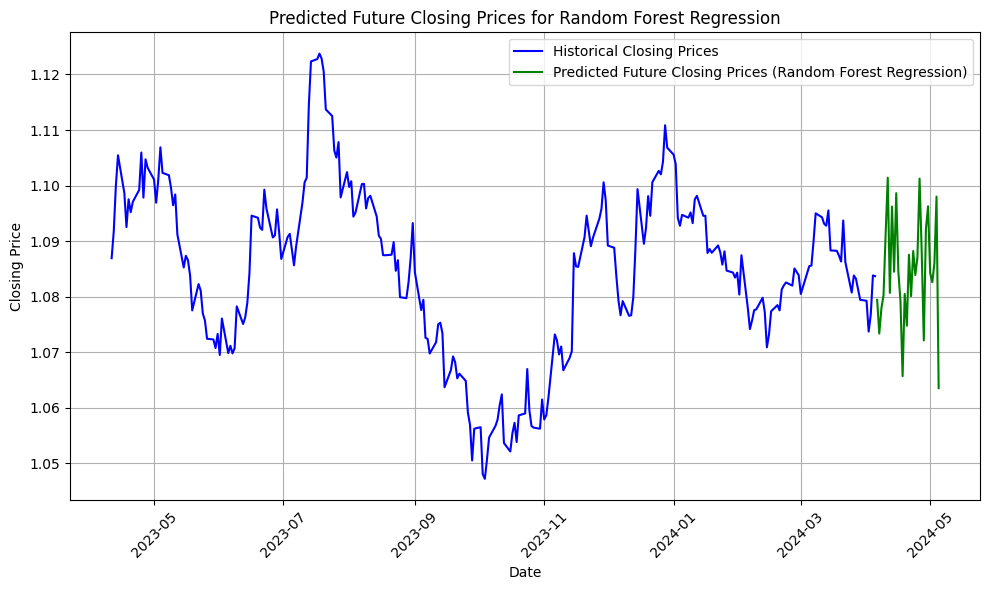

In [ ]:
# Step 4: Data processing for future close price prediction
from datetime import timedelta
import numpy as np

# Data Processing for future close price prediction
mean = X.mean()
std = X.std()
num_samples = 30  # Assuming we want to predict for the next 30 days
future_dates = pd.date_range(start=currency_data.index[-1] + timedelta(days=1), periods=num_samples)
future_data = pd.DataFrame(np.random.normal(loc=mean, scale=std, size=(num_samples, len(X.columns))), columns=X.columns)
future_data['Date'] = future_dates
future_data = future_data[['Date', 'Open', 'High', 'Low', 'Adj Close']]

# Step 8: Predict future closing prices for Random Forest Regression
future_predictions_rf = model_rf.predict(future_data[['Open', 'High', 'Low', 'Adj Close']])

# Create a DataFrame to store predicted values with dates for Random Forest Regression
predicted_df_rf = pd.DataFrame({'Date': future_dates, 'Predicted Close (Random Forest Regression)': future_predictions_rf})

# Print predicted future closing prices for Random Forest Regression
print("Predicted Future Closing Prices for Random Forest Regression:\n", predicted_df_rf)

# Plot predicted future closing prices for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.plot(currency_data.index, currency_data['Close'], label='Historical Closing Prices', color='blue')
plt.plot(predicted_df_rf['Date'], predicted_df_rf['Predicted Close (Random Forest Regression)'], label='Predicted Future Closing Prices (Random Forest Regression)', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Predicted Future Closing Prices for Random Forest Regression')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comparison of Linear Regression & Random Forest Regression Model**

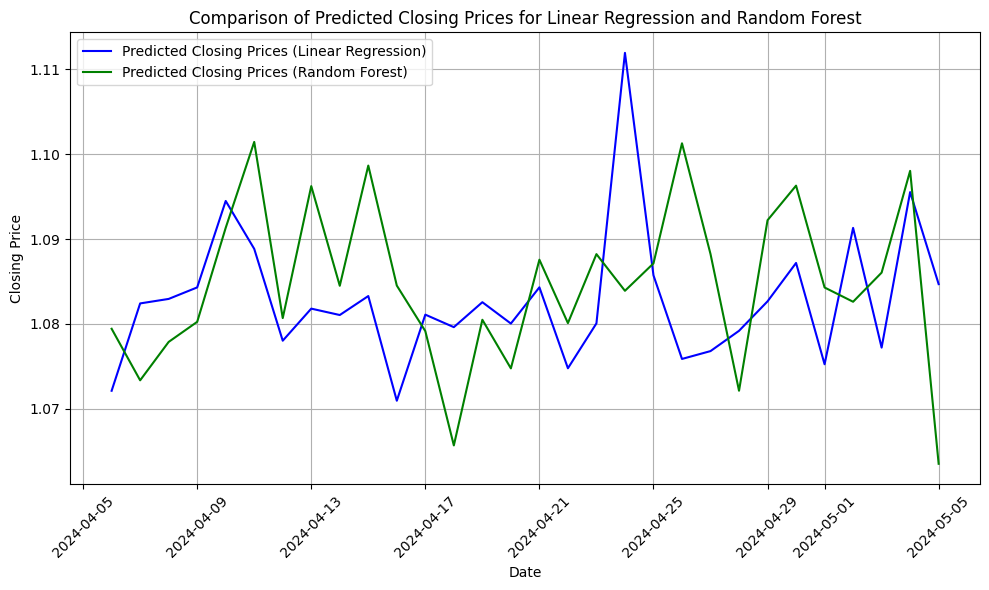

In [ ]:
# Define future date range for Linear Regression predictions
future_dates_range_lr = pd.date_range(start=currency_data.index[-1] + pd.Timedelta(days=1), periods=len(predicted_df_lr))

# Define future date range for Random Forest predictions
future_dates_range_rf = pd.date_range(start=currency_data.index[-1] + pd.Timedelta(days=1), periods=len(predicted_df_rf))

# Comparison Plot of Predicted Closing Prices for Linear Regression and Random Forest
plt.figure(figsize=(10, 6))

# Plot Linear Regression predictions
plt.plot(future_dates_range_lr, predicted_df_lr['Predicted Close (Linear Regression)'], label='Predicted Closing Prices (Linear Regression)', color='blue')

# Plot Random Forest predictions
plt.plot(future_dates_range_rf, predicted_df_rf['Predicted Close (Random Forest Regression)'], label='Predicted Closing Prices (Random Forest)', color='green')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Comparison of Predicted Closing Prices for Linear Regression and Random Forest')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Unsupervised Learning**

In [ ]:
# Step 1: Calculate volatility

# Calculate volatility
currency_data['Volatility'] = currency_data['High'] - currency_data['Low']

In [ ]:
# Step 2: Select relevant features for anomaly detection & normalize the features

# Select relevant features for anomaly detection
features = ['Open', 'High', 'Low', 'Adj Close', 'Volatility']

# Normalize the features
currency_data_normalized = (currency_data[features] - currency_data[features].mean()) / currency_data[features].std()

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
#Step 3: Model Training
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to the data
isolation_forest.fit(currency_data_normalized)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# Step 4: Predict outliers/anomalies and add predictions to the original dataset
# Predict outliers/anomalies
outliers = isolation_forest.predict(currency_data_normalized)

# Add the outlier predictions to the original dataset
currency_data['Outlier'] = outliers

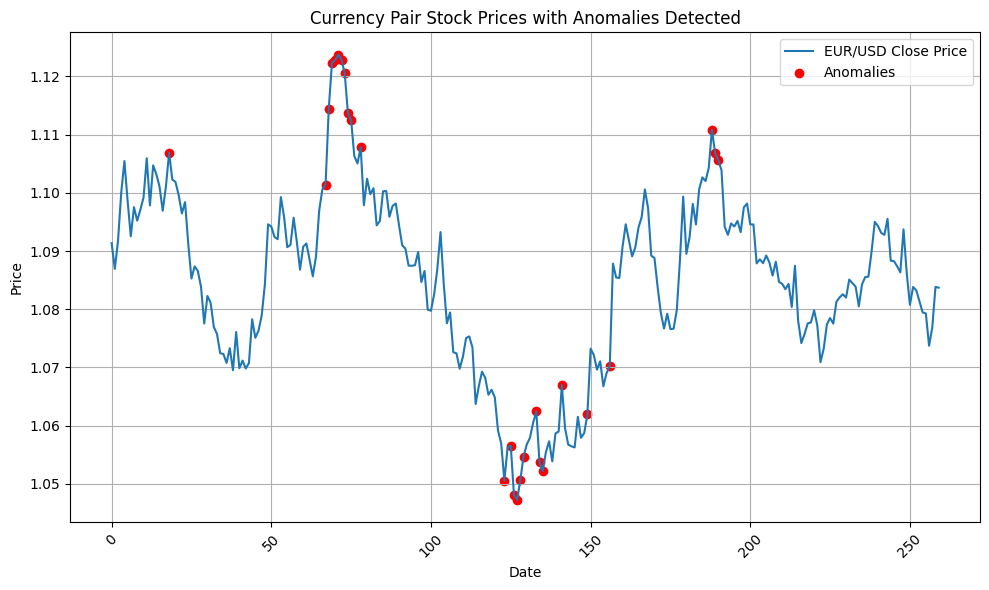

In [ ]:
# Step 5: Plot anomalies (trendline plot)
# Plotting Close Price
plt.figure(figsize=(10, 6))
plt.plot(currency_data.index, currency_data['Close'], label='EUR/USD Close Price')
plt.scatter(currency_data.index[currency_data['Outlier'] == -1], currency_data.loc[currency_data['Outlier'] == -1, 'Close'], color='red', label='Anomalies')
plt.title('Currency Pair Stock Prices with Anomalies Detected')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# **Evaluation Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, last_month_predictions_lr)
r2_lr = r2_score(y_test, last_month_predictions_lr)

# Print evaluation results for Linear Regression
print("Evaluation Metrics for Linear Regression Model:")
print("Mean Squared Error (MSE):", mse_lr)
print("R-squared (R2) Score:", r2_lr)

# Evaluate Random Forest Regression model
mse_rf = mean_squared_error(y_test, last_month_predictions_rf)
r2_rf = r2_score(y_test, last_month_predictions_rf)

# Print evaluation results for Random Forest Regression
print("\nEvaluation Metrics for Random Forest Regression Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2) Score:", r2_rf)

Evaluation Metrics for Linear Regression Model:
Mean Squared Error (MSE): 2.140893127266192e-11
R-squared (R2) Score: 0.9999993556336734

Evaluation Metrics for Random Forest Regression Model:
Mean Squared Error (MSE): 9.363687949778181e-08
R-squared (R2) Score: 0.997181715831304


In [ ]:
# Calculate the proportion of anomalies detected
total_samples = len(currency_data)
num_anomalies = len(currency_data[currency_data['Outlier'] == -1])  # Assuming -1 represents anomalies
proportion_anomalies = num_anomalies / total_samples

# Print the proportion of anomalies
print("Proportion of Anomalies:", proportion_anomalies)

Proportion of Anomalies: 0.10038610038610038


# **Comparison of Supervised & Unsupervised Model**

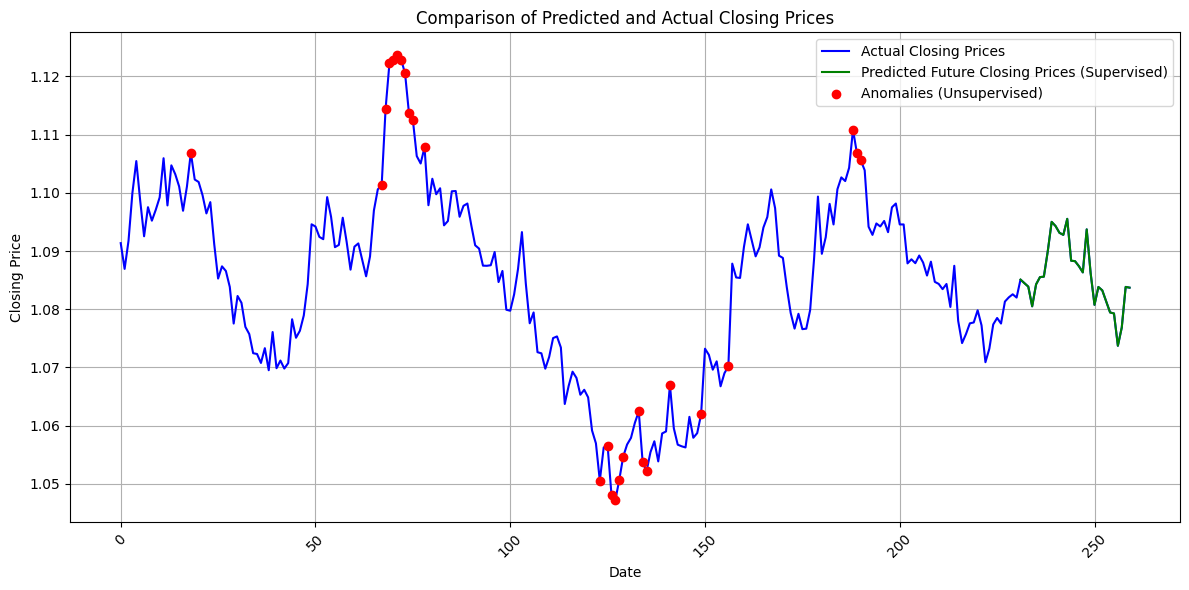

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot actual closing prices
plt.plot(currency_data.index, currency_data['Close'], label='Actual Closing Prices', color='blue')

# Plot predicted closing prices from the supervised model
plt.plot(currency_data.index[-len(X_test):], y_pred, label='Predicted Future Closing Prices (Supervised)', color='green')

# Plot anomalies detected by the unsupervised model
plt.scatter(currency_data.index[currency_data['Outlier'] == -1], currency_data.loc[currency_data['Outlier'] == -1, 'Close'], color='red', label='Anomalies (Unsupervised)', zorder=5)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Comparison of Predicted and Actual Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()